In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [20]:
df =pd.read_csv("data.csv")
df.head()

,Reviewer_Name,Reviewer_Rating,Review_Title,Review_Text,Place_of_Review,Date_of_Review,Up_Votes,Down_Votes
0,Sumit Kumar,5.0,Wonderful,I think In this price category it's best dosa ...,"Certified Buyer, Lakhisarai",Sumit Kumar,211,39
1,BHARAT GALAGALI,5.0,Mind-blowing purchase,perfect tawa for Dosa..READ MORE,"Certified Buyer, Hunsur",BHARAT GALAGALI,107,17
2,Paramjeet Singh,5.0,Awesome,Excellent tawa. Made Paneer Tikka on first day...,"Certified Buyer, Rampura Phul",Paramjeet Singh,59,8
3,Virendra Kumar,5.0,Great product,Nice 🙂 productREAD MORE,"Certified Buyer, Chengalpattu District",Virendra Kumar,77,12
4,jyoti solanki,5.0,Best in the market!,Delivery man is also good....READ MORE,"Certified Buyer, Mumbai",jyoti solanki,53,7


In [21]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.




[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
df["Reviewer_Rating"].value_counts()

5.0    1408
4.0     589
3.0     288
Name: Reviewer_Rating, dtype: int64

In [24]:
pd.unique(df["Reviewer_Rating"])

array([ 5.,  3.,  4., nan])

In [25]:
df.dropna(subset=['Reviewer_Rating'], inplace=True)


In [26]:
pd.unique(df["Reviewer_Rating"])

array([5., 3., 4.])

<AxesSubplot: xlabel='Reviewer_Rating', ylabel='count'>

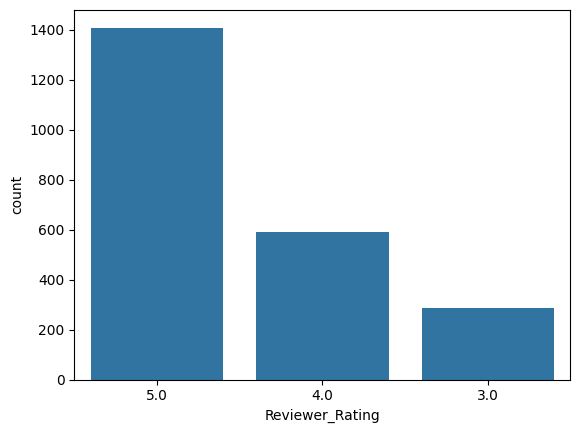

In [27]:
sns.countplot(data=df,
              x='Reviewer_Rating',
              order=df.Reviewer_Rating.value_counts().index)

In [28]:
# Initialize an empty list to store the labels
pos_neg = []

# Loop through each rating and label them accordingly
for rating in df["Reviewer_Rating"]:
    if rating >= 5:
        pos_neg.append(1)
    else:
        pos_neg.append(0)

# Assign the labels to the 'label' column in the DataFrame
df['label'] = pos_neg


In [29]:
df.head()

,Reviewer_Name,Reviewer_Rating,Review_Title,Review_Text,Place_of_Review,Date_of_Review,Up_Votes,Down_Votes,label
0,Sumit Kumar,5.0,Wonderful,I think In this price category it's best dosa ...,"Certified Buyer, Lakhisarai",Sumit Kumar,211,39,1
1,BHARAT GALAGALI,5.0,Mind-blowing purchase,perfect tawa for Dosa..READ MORE,"Certified Buyer, Hunsur",BHARAT GALAGALI,107,17,1
2,Paramjeet Singh,5.0,Awesome,Excellent tawa. Made Paneer Tikka on first day...,"Certified Buyer, Rampura Phul",Paramjeet Singh,59,8,1
3,Virendra Kumar,5.0,Great product,Nice 🙂 productREAD MORE,"Certified Buyer, Chengalpattu District",Virendra Kumar,77,12,1
4,jyoti solanki,5.0,Best in the market!,Delivery man is also good....READ MORE,"Certified Buyer, Mumbai",jyoti solanki,53,7,1


In [30]:
df["label"].value_counts()

1    1408
0     877
Name: label, dtype: int64

## Spliting data

In [31]:
from sklearn.model_selection import train_test_split

# Assuming you have loaded your dataset into a DataFrame called 'data'

# Split the data into features (reviews) and labels (labels)
X = df['Review_Text']
y = df['label']  # Assuming your target variable is named 'label'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

# Print the number of training and testing examples
print('Loaded %d training examples and %d validation examples.\n' %(X_train.shape[0], X_test.shape[0]))
print('Example review in the training set:\n', X_train.iloc[10])

# Optionally, you can print the labels as well
print('Corresponding label in the training set:', y_train.iloc[10])


Loaded 2056 training examples and 229 validation examples.

Example review in the training set:
 Good and excellentREAD MORE
Corresponding label in the training set: 1


In [32]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from bs4 import BeautifulSoup

def cleanText(raw_text, remove_stopwords=False, stemming=False, split_text=False, remove_read_more=False):
    '''
    Convert a raw review to a cleaned review
    '''
    text = BeautifulSoup(raw_text, 'html.parser').get_text()
    
    # Remove "read more" if specified
    if remove_read_more:
        text = re.sub(r'read more', '', text, flags=re.IGNORECASE)
    
    letters_only = re.sub("[^a-zA-Z]", " ", text)
    words = letters_only.lower().split() 
    
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
        
    if stemming:
        stemmer = SnowballStemmer('english') 
        words = [stemmer.stem(w) for w in words]
        
    if split_text:
        return words
    
    return " ".join(words)

# Assuming you have a DataFrame called 'df' with a column named 'Review_Text'

# Clean the Review_Text column in the DataFrame
X_train = X_train.apply(cleanText, remove_read_more=True)

# Display a cleaned review from the DataFrame
print('Show a cleaned review in the DataFrame:\n', X_train.iloc[10])


Show a cleaned review in the DataFrame:
 good and excellent


In [34]:
pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
## CountVectorizer with Mulinomial Naive Bayes (Benchmark Model)

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Initialize CountVectorizer
countVect = CountVectorizer()

# Transform the cleaned text data into a document-term matrix
X_train_countVect = countVect.fit_transform(X_train)

# Get the feature names from the vocabulary
feature_names = countVect.get_feature_names_out()

# Print the number of features
print("Number of features: %d\n" % len(feature_names))

# Print some feature names
print("Show some feature names:\n", feature_names[::1000])

# Train Multinomial Naive Bayes classifier
mnb = MultinomialNB()
mnb.fit(X_train_countVect, y_train)


Number of features: 944

Show some feature names:
 ['able']


MultinomialNB()

In [37]:
X_train

2231                                                   ok
1906    it is very useful product quality design non s...
1108                                perfect tawa for dosa
2036                                      awesome product
488        khub valo tawa ta light weight thanku flipkart
                              ...                        
1141                                                 good
1917                     very good product i am satisfied
846                                             it s nice
922                                          best product
1827                         ok product bad paint quality
Name: Review_Text, Length: 2056, dtype: object

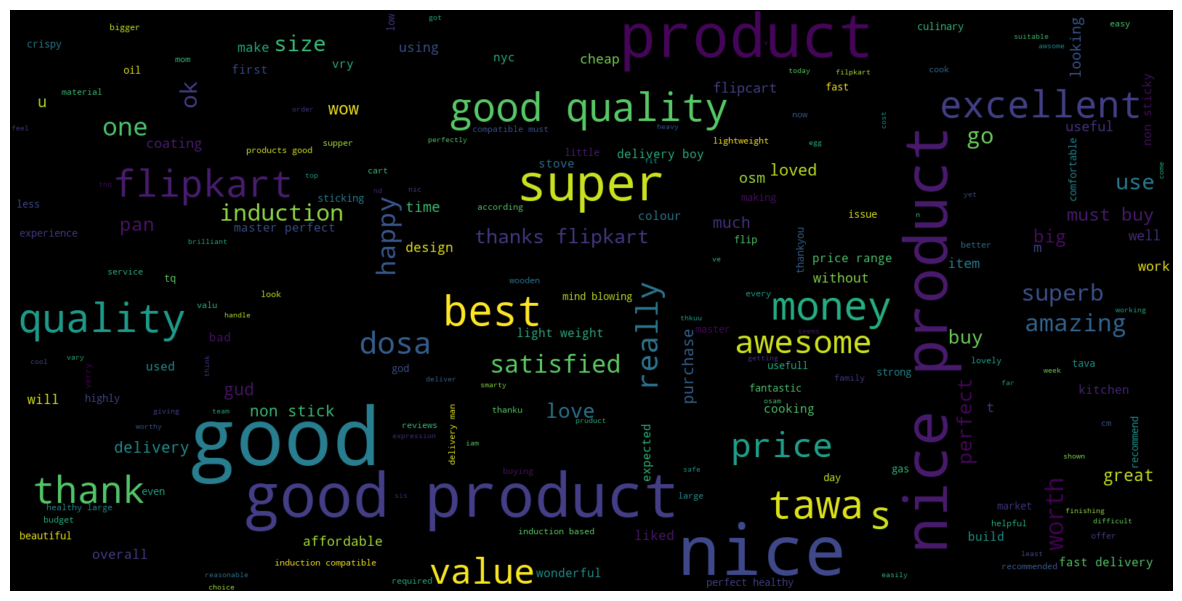

In [38]:
from wordcloud import WordCloud

consolidated = ' '.join(
    word for word in X_train [df['label'] == 1].astype(str))
wordCloud = WordCloud(width=1600, height=800,
                      random_state=21, max_font_size=110)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

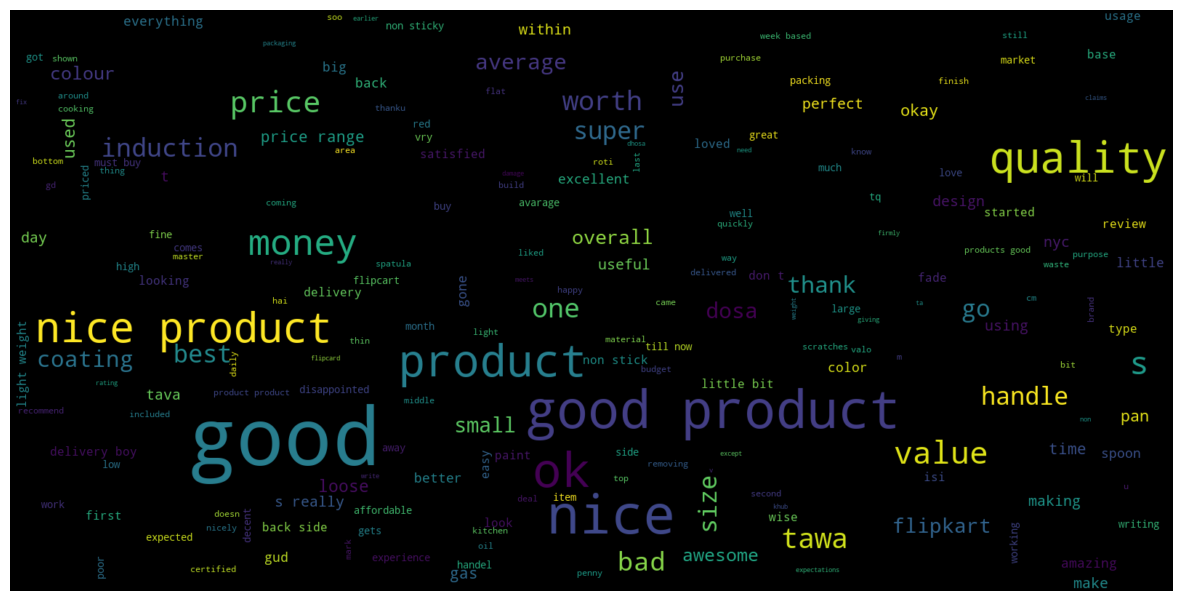

In [39]:
from wordcloud import WordCloud

consolidated = ' '.join(
    word for word in X_train [df['label'] == 0].astype(str))
wordCloud = WordCloud(width=1600, height=800,
                      random_state=21, max_font_size=110)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Initialize CountVectorizer
countVect = CountVectorizer()

# Transform the cleaned text data into a document-term matrix
X_train_countVect = countVect.fit_transform(X_train)

# Get the feature names from the vocabulary
feature_names = countVect.get_feature_names_out()

# Print the number of features
print("Number of features: %d\n" % len(feature_names))

# Print some feature names
print("Show some feature names:\n", feature_names[:40])  # Print the first 40 feature names

# Train Multinomial Naive Bayes classifier
mnb = MultinomialNB()
mnb.fit(X_train_countVect, y_train)

# Print the trained Multinomial Naive Bayes classifier
print(mnb)


Number of features: 944

Show some feature names:
 ['able' 'about' 'above' 'according' 'acha' 'adirampattinam' 'adjust'
 'affordable' 'after' 'again' 'al' 'alhamdulillah' 'aligent' 'all'
 'allover' 'allthank' 'allways' 'almost' 'along' 'already' 'also'
 'alsovalue' 'always' 'am' 'amazing' 'amount' 'an' 'and' 'another'
 'anwsome' 'any' 'anyone' 'apart' 'app' 'appreciatable' 'approval' 'ar'
 'are' 'area' 'around']
MultinomialNB()


In [41]:
pip install --upgrade scikit-learn

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.




[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
import pickle

# Serialize the CountVectorizer object
with open('countVect_imdb.pkl', 'wb') as file:
    pickle.dump(countVect, file)


In [43]:
from sklearn import metrics
from sklearn.metrics import accuracy_score,roc_auc_score
def modelEvaluation(predictions):
    '''
    Print model evaluation to predicted result 
    '''
    print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test, predictions)))
    print("\nAUC score : {:.4f}".format(roc_auc_score(y_test, predictions)))
    print("\nClassification report : \n", metrics.classification_report(y_test, predictions))
    print("\nConfusion Matrix : \n", metrics.confusion_matrix(y_test, predictions))

In [44]:
predictions = mnb.predict(countVect.transform(X_test))
modelEvaluation(predictions)


Accuracy on validation set: 0.6376

AUC score : 0.6544

Classification report : 
               precision    recall  f1-score   support

           0       0.53      0.74      0.62        91
           1       0.77      0.57      0.66       138

    accuracy                           0.64       229
   macro avg       0.65      0.65      0.64       229
weighted avg       0.67      0.64      0.64       229


Confusion Matrix : 
 [[67 24]
 [59 79]]


In [45]:
import pickle
pickle.dump(mnb,open('Naive_Bayes_model.pkl','wb'))

In [46]:
## TfidfVectorizer with Logistic Regression

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Initialize TfidfVectorizer
tfidf = TfidfVectorizer(min_df=5) # minimum document frequency of 5

# Transform the cleaned text data into a TF-IDF matrix
X_train_tfidf = tfidf.fit_transform(X_train)

# Print the number of features
print("Number of features : %d \n" %len(tfidf.get_feature_names_out())) 

# Print some feature names
print("Show some feature names : \n", tfidf.get_feature_names_out()[::1000])

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_tfidf, y_train)


Number of features : 177 

Show some feature names : 
 ['affordable']


LogisticRegression()

In [48]:
feature_names = np.array(tfidf.get_feature_names_out())
sorted_coef_index = lr.coef_[0].argsort()
print('\nTop 10 features with smallest coefficients :\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Top 10 features with largest coefficients : \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))


Top 10 features with smallest coefficients :
['average' 'not' 'but' 'just' 'ok' 'okay' 'handle' 'small' 'loose'
 'coating']

Top 10 features with largest coefficients : 
['excellent' 'superb' 'very' 'flipkart' 'super' 'happy' 'wow' 'perfect'
 'buy' 'best']


In [49]:
predictions = lr.predict(tfidf.transform(X_test))
modelEvaluation(predictions)



Accuracy on validation set: 0.5764

AUC score : 0.5082

Classification report : 
               precision    recall  f1-score   support

           0       0.42      0.18      0.25        91
           1       0.61      0.84      0.71       138

    accuracy                           0.58       229
   macro avg       0.51      0.51      0.48       229
weighted avg       0.53      0.58      0.52       229


Confusion Matrix : 
 [[ 16  75]
 [ 22 116]]


In [50]:
from sklearn.model_selection import  GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.pipeline import Pipeline
estimators = [("tfidf", TfidfVectorizer()), ("lr", LogisticRegression())]
model = Pipeline(estimators)


params = {"lr__C":[0.1, 1, 10], 
          "tfidf__min_df": [1, 3], 
          "tfidf__max_features": [1000, None], 
          "tfidf__ngram_range": [(1,1), (1,2)], 
          "tfidf__stop_words": [None, "english"]} 

grid = GridSearchCV(estimator=model, param_grid=params, scoring="accuracy", n_jobs=-1)
grid.fit(X_train, y_train)
print("The best paramenter set is : \n", grid.best_params_)


# Evaluate on the validaton set
predictions = grid.predict(X_test)
modelEvaluation(predictions)

The best paramenter set is : 
 {'lr__C': 1, 'tfidf__max_features': None, 'tfidf__min_df': 1, 'tfidf__ngram_range': (1, 2), 'tfidf__stop_words': None}

Accuracy on validation set: 0.6070

AUC score : 0.5186

Classification report : 
               precision    recall  f1-score   support

           0       0.53      0.09      0.15        91
           1       0.61      0.95      0.74       138

    accuracy                           0.61       229
   macro avg       0.57      0.52      0.45       229
weighted avg       0.58      0.61      0.51       229


Confusion Matrix : 
 [[  8  83]
 [  7 131]]


In [51]:
## Word2Vec

In [52]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Pc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [53]:
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

def parseSent(review, tokenizer, remove_stopwords=False):

    raw_sentences = tokenizer.tokenize(review.strip())
    sentences = []
    for raw_sentence in raw_sentences:
        if len(raw_sentence) > 0:
            sentences.append(cleanText(raw_sentence, remove_stopwords, split_text=True))
    return sentences


# Parse each review in the training set into sentences
sentences = []
for review in X_train:
    sentences += parseSent(review, tokenizer,remove_stopwords=False)
    
print('%d parsed sentence in the training set\n'  %len(sentences))
print('Show a parsed sentence in the training set : \n',  sentences[10])

2051 parsed sentence in the training set

Show a parsed sentence in the training set : 
 ['good', 'and', 'excellent']


In [54]:
import nltk
nltk.download('punkt')

tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

def parseSent(review, tokenizer, remove_stopwords=False):
    raw_sentences = tokenizer.tokenize(review.strip())
    sentences = []
    for raw_sentence in raw_sentences:
        if len(raw_sentence) > 0:
            sentences.append(cleanText(raw_sentence, remove_stopwords, split_text=True))
    return sentences

# Clean the text in X_train if it's not already cleaned
X_train_cleaned = X_train.apply(cleanText)

# Parse each review in the training set into sentences
sentences = []
for review in X_train_cleaned:
    sentences += parseSent(review, tokenizer, remove_stopwords=False)
    
print('%d parsed sentences in the training set\n' % len(sentences))
print('Show a parsed sentence in the training set:\n', sentences[10])


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Pc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


2051 parsed sentences in the training set

Show a parsed sentence in the training set:
 ['good', 'and', 'excellent']


In [55]:
sentences

[['ok'],
 ['it',
  'is',
  'very',
  'useful',
  'product',
  'quality',
  'design',
  'non',
  'stick',
  'coating',
  'size',
  'everything',
  'is',
  'nice',
  'and',
  'what',
  'all',
  'it',
  'claims',
  'meets',
  'the',
  'expectations',
  'just',
  'go',
  'for',
  'it'],
 ['perfect', 'tawa', 'for', 'dosa'],
 ['awesome', 'product'],
 ['khub', 'valo', 'tawa', 'ta', 'light', 'weight', 'thanku', 'flipkart'],
 ['helpful'],
 ['good', 'quality'],
 ['nice', 'product'],
 ['nice'],
 ['ok'],
 ['good', 'and', 'excellent'],
 ['awesome'],
 ['good'],
 ['good', 'thankyou'],
 ['nice', 'products'],
 ['it',
  's',
  'really',
  'good',
  'size',
  'is',
  'amazing',
  'can',
  'be',
  'used',
  'on',
  'both',
  'induction',
  'as',
  'well',
  'as',
  'on',
  'gas',
  'it',
  's',
  'non',
  'sticky',
  'but',
  'the',
  'colour',
  'fades',
  'away',
  'quickly',
  'otherwise',
  'overall',
  'product',
  'is',
  'good',
  'u',
  'can',
  'go',
  'for',
  'it'],
 ['useful'],
 ['nice'],
 ['i

In [56]:
## Creating Volcabulary List usinhg Word2Vec Model

In [57]:
pip install gensim

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [58]:
from gensim.models import Word2Vec
from wordcloud import WordCloud
from gensim.models import word2vec
from gensim.models.keyedvectors import KeyedVectors
num_features = 300  #embedding dimension                     
min_word_count = 10                
num_workers = 4       
context = 10                                                                                          
downsampling = 1e-3 

print("Training Word2Vec model ...\n")
w2v = Word2Vec(sentences, workers=num_workers, vector_size=num_features, min_count=min_word_count, window=context, sample=downsampling)
w2v.init_sims(replace=True)
w2v.save("w2v_300features_10minwordcounts_10context") #save trained word2vec model

print("Number of words in the vocabulary list : %d \n" %len(w2v.wv.index_to_key))
print("Show first 10 words in the vocabulary list: \n", w2v.wv.index_to_key[0:10])


Training Word2Vec model ...

Number of words in the vocabulary list : 111 

Show first 10 words in the vocabulary list: 
 ['good', 'product', 'nice', 'very', 'it', 'for', 'is', 'quality', 'and', 'super']


In [59]:
## Averaging Feature Vectors

In [60]:
def makeFeatureVec(review, model, num_features):
    '''
    Transform a review to a feature vector by averaging feature vectors of words 
    appeared in that review and in the vocabulary list created
    '''
    featureVec = np.zeros((num_features,), dtype="float32")
    nwords = 0.
    index_to_key_set = set(model.wv.index_to_key)  # index_to_key is the vocabulary list of the Word2Vec model
    isZeroVec = True
    for word in review:
        if word in index_to_key_set: 
            nwords += 1
            featureVec = np.add(featureVec, model.wv[word])
            isZeroVec = False
    if not isZeroVec:
        featureVec = np.divide(featureVec, nwords)
    return featureVec


In [61]:
def getAvgFeatureVecs(reviews, model, num_features):
    '''
    Transform all reviews to feature vectors using makeFeatureVec()
    '''
    counter = 0
    reviewFeatureVecs = np.zeros((len(reviews),num_features),dtype="float32")
    for review in reviews:
        reviewFeatureVecs[counter] = makeFeatureVec(review, model,num_features)
        counter = counter + 1
    return reviewFeatureVecs

In [62]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [63]:
from gensim.models import Word2Vec
import numpy as np

X_train_cleaned = []
for review in X_train:
    X_train_cleaned.append(cleanText(review, remove_stopwords=True, split_text=True))

trainVector = getAvgFeatureVecs(X_train_cleaned, w2v, num_features)
print("Training set : %d feature vectors with %d dimensions" % trainVector.shape)

# Get feature vectors for validation set
X_test_cleaned = []
for review in X_test:
    X_test_cleaned.append(cleanText(review, remove_stopwords=True, split_text=True))

testVector = getAvgFeatureVecs(X_test_cleaned, w2v, num_features)
print("Validation set : %d feature vectors with %d dimensions" % testVector.shape)


Training set : 2056 feature vectors with 300 dimensions
Validation set : 229 feature vectors with 300 dimensions


In [64]:
## Random Forest Classifer

In [65]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(trainVector, y_train)
predictions = rf.predict(testVector)
modelEvaluation(predictions)


Accuracy on validation set: 0.6114

AUC score : 0.5185

Classification report : 
               precision    recall  f1-score   support

           0       0.60      0.07      0.12        91
           1       0.61      0.97      0.75       138

    accuracy                           0.61       229
   macro avg       0.61      0.52      0.43       229
weighted avg       0.61      0.61      0.50       229


Confusion Matrix : 
 [[  6  85]
 [  4 134]]


In [66]:
## LSTM

In [67]:
pip install keras

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [68]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [69]:
pip install --upgrade tensorflow


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip
